In [1]:
pip install openeo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 47.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 28.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
import openeo

# Connect to Terrascope backend
conn = openeo.connect("https://openeo.vito.be")

# Authenticate (if required)
conn.authenticate_oidc()

# List available collections
collections = conn.list_collections()


Visit https://aai.egi.eu/device?user_code=CHCL-JQJP 📋 to authenticate.

❌ Timed out

OidcDeviceCodePollTimeout: Timeout (300.0s) while polling for access token.

In [4]:
# Step 1: Install & import the required openEO client
!pip install openeo --quiet

import openeo
import datetime

# Step 2: Connect to the VITO backend & authenticate
conn = openeo.connect("https://openeo.vito.be").authenticate_oidc()

# Step 3: Define spatial & temporal extent (Overijssel, Netherlands)
# Approximate bounding box for Overijssel
spatial_extent = {
    "west": 6.0,
    "south": 52.2,
    "east": 7.1,
    "north": 52.8
}

# Temporal range for May 2022
temporal_extent = ["2022-05-01", "2022-05-31"]

# Step 4: Define collections
collections = {
    "LAI": "TERRASCOPE_S2_LAI_V2",
    "FAPAR": "TERRASCOPE_S2_FAPAR_V2"
}

# Step 5: Try loading one observation from each to check availability
for name, collection in collections.items():
    print(f"\nChecking {name} ({collection})...")
    
    datacube = conn.load_collection(
        collection,
        spatial_extent=spatial_extent,
        temporal_extent=temporal_extent
    )
    
    # Print metadata
    print(datacube.metadata)


Authenticated using refresh token.

Checking LAI (TERRASCOPE_S2_LAI_V2)...
CollectionMetadata({'spatial': {'bbox': [[-180, -56, 180, 83]]}, 'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}} - ['LAI_10M', 'SCENECLASSIFICATION_20M'] - ['bands', 't', 'x', 'y'])

Checking FAPAR (TERRASCOPE_S2_FAPAR_V2)...
CollectionMetadata({'spatial': {'bbox': [[-180, -56, 180, 83]]}, 'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}} - ['FAPAR_10M', 'SCENECLASSIFICATION_20M'] - ['bands', 't', 'x', 'y'])


In [24]:
from datetime import datetime
import openeo

# Reconnect
conn = openeo.connect("https://openeo.vito.be").authenticate_oidc()

# Try a wider temporal window and larger bounding box in Overijssel

spatial_extent = {
    "west": 6.0,     # was 6.6 earlier
    "south": 52.3,   # was 52.4
    "east": 7.1,
    "north": 52.7    # was 52.6
}

temporal_extent = ["2022-05-01", "2022-05-31"]

# Use this to test availability
cube = conn.load_collection(
    "TERRASCOPE_S2_LAI_V2",
    spatial_extent=spatial_extent,
    temporal_extent=temporal_extent,
    bands=["LAI_10M"]
)

print(cube.metadata)  # just to confirm it loads

# Load LAI data
lai_cube = conn.load_collection(
    "TERRASCOPE_S2_LAI_V2",
    spatial_extent=spatial_extent,
    temporal_extent=dates,
    bands=["LAI_10M"]
)

# Load FAPAR data
fapar_cube = conn.load_collection(
    "TERRASCOPE_S2_FAPAR_V2",
    spatial_extent=spatial_extent,
    temporal_extent=dates,
    bands=["FAPAR_10M"]
)

# Download LAI & FAPAR as GeoTIFF
lai_cube.download("LAI_T31UFT_may2022.tiff", format="GTiff")
fapar_cube.download("FAPAR_T31UFT_may2022.tiff", format="GTiff")


Authenticated using refresh token.
CollectionMetadata({'spatial': {'bbox': [[-180, -56, 180, 83]]}, 'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}} - ['LAI_10M'] - ['bands', 't', 'x', 'y'])


In [25]:
import rasterio

with rasterio.open("LAI_T31UFT_may2022.tiff") as src:
    print(f"Shape: {src.shape}")
    print(f"Dtype: {src.dtypes}")
    print(f"CRS: {src.crs}")


Shape: (4703, 7617)
Dtype: ('uint8',)
CRS: EPSG:32632


In [26]:
conn.describe_collection("TERRASCOPE_S2_LAI_V2")

{'assets': {'metadata_iso_19139': {'href': 'https://services.terrascope.be/collectioncatalogue/srv/api/records/urn:eop:VITO:TERRASCOPE_S2_LAI_V2/formatters/xml?approved=true',
   'roles': ['metadata', 'iso-19139'],
   'title': 'ISO 19139 metadata',
   'type': 'application/vnd.iso.19139+xml'},
  'thumbnail': {'href': 'https://services.terrascope.be/collectioncatalogue/images/quicklooks/SENTINEL2_LAI_V2_QL.JPG',
   'roles': ['thumbnail'],
   'title': 'Thumbnail',
   'type': 'image/jpeg'}},
 'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['LAI_10M', 'SCENECLASSIFICATION_20M']},
  't': {'extent': ['2015-07-06T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': 'Leaf area index Level-3 product at 10m resolution. Covers selected areas globally. This LAI is derived directly from ESA L2A products.',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
 'id': 'TERRASCOPE_S2_LAI_V2',
 'keywords': ['VITO',
  'TERRASCOPE',
  'COPERNICUS',
  'ESA',
  'Orthoimagery',
  'Sentinel-2',
  'MSI',
  'Level-3',
  'Radiometry',
  'Plant Resource',
  'LAI'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license'},
  {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_LAI_V2',
   'rel': 'alternate'},
  {'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-2/Biopar/Biopar?id=vegetation-indicators',
   'rel': 'alternate',
   'title': 'Product documentation'},
  {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_LAI',
   'rel': 'alternate'},
  {'href': 'https://services.terrascope.be/wmts/v2',
   'rel': 'wmts',
   'wmts:layer': 'CGS_S2_LAI'},
  {'href': 'https://openeo.vito.be/openeo/1.2/collections', 'rel': 'root'},
  {'href': 'https://openeo.vito.b

In [17]:
import openeo
from datetime import datetime

# Connect and authenticate
conn = openeo.connect("https://openeo.vito.be").authenticate_oidc()

# Tiles and their bounding boxes
tiles = {
    "T31UFT": {"west": 4.436120625114681, "south": 51.324523354307196, "east": 6.077757925298724, "north": 52.34135509678961},
    "T31UGS": {"west": 6.5, "south": 52.0, "east": 7.5, "north": 53.0},
    "T32UMT": {"west": 6.5, "south": 51.5, "east": 7.5, "north": 52.5},
    "T32ULT": {"west": 6.5, "south": 51.0, "east": 7.5, "north": 52.0},  # optional
}

# Dates to download (format: YYYY-MM-DD)
dates = ["2022-05-10", "2022-05-30"]

# Products and their band names
products = {
    "LAI": {"collection": "TERRASCOPE_S2_LAI_V2", "band": "LAI_10M"},
    "FAPAR": {"collection": "TERRASCOPE_S2_FAPAR_V2", "band": "FAPAR_10M"}
}

# Loop through products, tiles, and dates
for product_name, info in products.items():
    for tile_id, bbox in tiles.items():
        for date in dates:
            print(f"Downloading {product_name} for {tile_id} on {date}...")

            cube = conn.load_collection(
                info["collection"],
                spatial_extent=bbox,
                temporal_extent=[date, date],
                bands=[info["band"]]
            )

            filename = f"{product_name}_{tile_id}_{date}.tiff"
            cube.download(filename, format="GTiff")
            print(f"✔️ Saved as {filename}")


Authenticated using refresh token.
✔️ Saved as LAI_T31UFT_2022-05-10.tiff
✔️ Saved as LAI_T31UFT_2022-05-30.tiff


OpenEoApiError: [400] NoDataAvailable: There is no data available for the given extents. Could not find data for your load_collection request with catalog ID "urn:eop:VITO:TERRASCOPE_S2_LAI_V2". The catalog query had correlation ID "r-2504251411554f0eb602aeb9f8defe02" and returned 0 results. (ref: r-2504251411554f0eb602aeb9f8defe02)

In [ ]:
import rasterio

with rasterio.open("LAI_T31UFT_2022-05-10.tiff") as src:
    print(f"Shape: {src.shape}")          # (rows, cols)
    print(f"Resolution: {src.res}")       # Should be (10.0, 10.0) for 10m
    print(f"CRS: {src.crs}")
    print(f"Data Type: {src.dtypes}")
    print(f"Min/Max: {src.read(1).min()}, {src.read(1).max()}")


In [10]:
pip install rasterio numpy matplotlib


Note: you may need to restart the kernel to use updated packages.


In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Your files
vi_file = "/home/jovyan/mystorage/NPP_project/NPP_inputs/CLMS_products/VI_20220510T104621_S2A_T31UFT-010m_V101_LAI_FIXED_Qgis.tif"
openeo_file = "LAI_T31UFT_2022-05-10.tiff"

# Open and read both
with rasterio.open(vi_file) as src_vi, rasterio.open(openeo_file) as src_open:
    vi_data = src_vi.read(1).astype(float)
    open_data = src_open.read(1).astype(float)

    # Optional: match extents if dimensions are slightly off
    min_rows = min(vi_data.shape[0], open_data.shape[0])
    min_cols = min(vi_data.shape[1], open_data.shape[1])

    vi_data = vi_data[:min_rows, :min_cols]
    open_data = open_data[:min_rows, :min_cols]

    # Basic difference
    diff = open_data - vi_data
    diff_abs = np.abs(diff)

    print(f"Mean abs difference: {np.nanmean(diff_abs):.2f}")
    print(f"Max difference: {np.nanmax(diff_abs):.2f}")

    # Histogram
    plt.figure(figsize=(10,5))
    plt.hist(vi_data.flatten(), bins=50, alpha=0.5, label='VI')
    plt.hist(open_data.flatten(), bins=50, alpha=0.5, label='OpenEO')
    plt.title("Value distribution comparison")
    plt.xlabel("LAI value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Visual difference map
    plt.figure(figsize=(8, 8))
    plt.imshow(diff, cmap='bwr', vmin=-20, vmax=20)
    plt.colorbar(label='LAI Difference (OpenEO - VI)')
    plt.title("Spatial Difference Map")
    plt.show()


NameError: name 'diff_abs' is not defined

In [2]:
print("OpenEO unique values:", np.unique(open_data))
print("VI unique values:", np.unique(vi_data))


NameError: name 'open_data' is not defined

In [4]:
lai_open_decoded = np.where(open_data == 255, np.nan, open_data * 0.1)
vi_data_masked = np.where(vi_data == -32768, np.nan, vi_data)


In [5]:
diff = lai_open_decoded - vi_data_masked
diff_abs = np.abs(diff)

print(f"Mean abs difference: {np.nanmean(diff_abs):.2f}")
print(f"Max difference: {np.nanmax(diff_abs):.2f}")


Mean abs difference: 2.44
Max difference: 25.00


Mean abs difference: 2.44
Max difference: 25.00


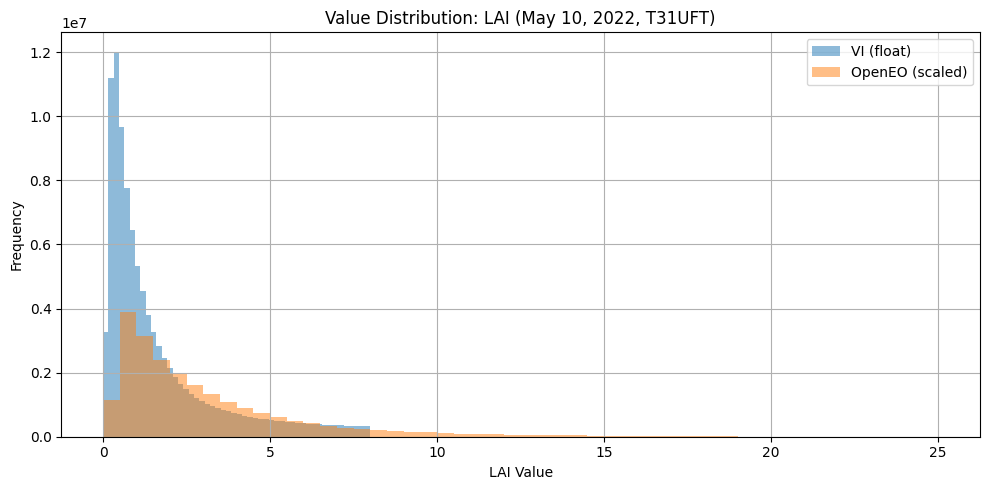

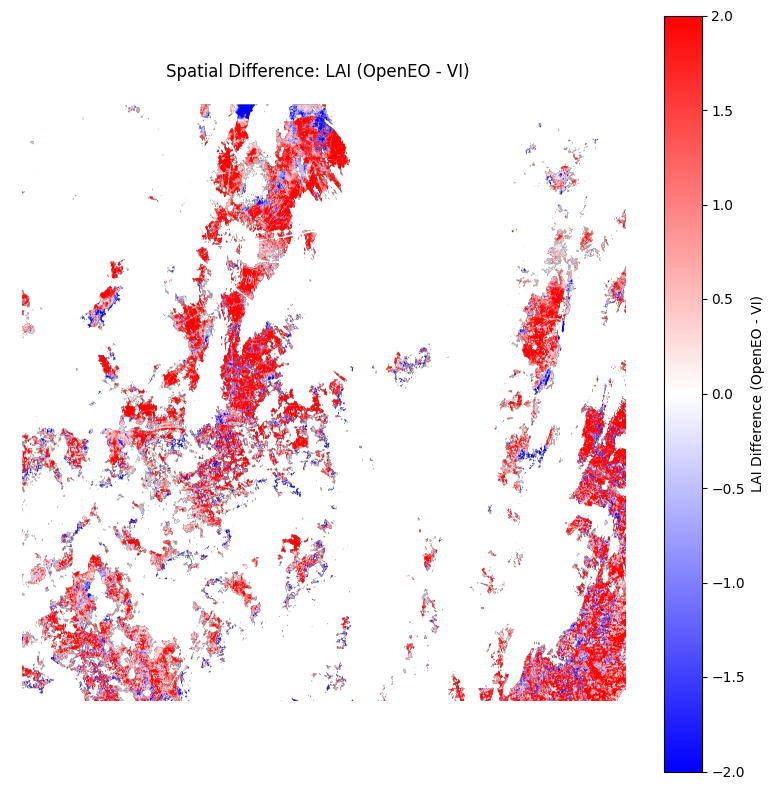

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Your files
vi_file = "/home/jovyan/mystorage/NPP_project/NPP_inputs/CLMS_products/VI_20220510T104621_S2A_T31UFT-010m_V101_LAI_FIXED_Qgis.tif"
openeo_file = "LAI_T31UFT_2022-05-10.tiff"

# Open and read both
with rasterio.open(vi_file) as src_vi, rasterio.open(openeo_file) as src_open:
    vi_data = src_vi.read(1).astype(float)
    open_data = src_open.read(1).astype(float)

    # Optional: match extents if dimensions are slightly off
    min_rows = min(vi_data.shape[0], open_data.shape[0])
    min_cols = min(vi_data.shape[1], open_data.shape[1])

    vi_data = vi_data[:min_rows, :min_cols]
    open_data = open_data[:min_rows, :min_cols]


diff = lai_open_decoded - vi_data_masked
diff_abs = np.abs(diff)

print(f"Mean abs difference: {np.nanmean(diff_abs):.2f}")
print(f"Max difference: {np.nanmax(diff_abs):.2f}")

# Assuming you've already created:
# - lai_open_decoded
# - vi_data_masked
# - diff = lai_open_decoded - vi_data_masked

# Histogram Comparison
plt.figure(figsize=(10, 5))
plt.hist(vi_data_masked[~np.isnan(vi_data_masked)].flatten(), bins=50, alpha=0.5, label='VI (float)')
plt.hist(lai_open_decoded[~np.isnan(lai_open_decoded)].flatten(), bins=50, alpha=0.5, label='OpenEO (scaled)')
plt.title("Value Distribution: LAI (May 10, 2022, T31UFT)")
plt.xlabel("LAI Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Spatial Difference Map
plt.figure(figsize=(8, 8))
masked_diff = np.ma.masked_invalid(diff)
plt.imshow(masked_diff, cmap='bwr', vmin=-2, vmax=2)  # Clip to LAI difference ±2
plt.colorbar(label='LAI Difference (OpenEO - VI)')
plt.title("Spatial Difference: LAI (OpenEO - VI)")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import rasterio

# Open files
with rasterio.open(vi_file) as src_vi, rasterio.open(openeo_file) as src_open:

    print("✅ VI Raster Extent:")
    print(f"  CRS: {src_vi.crs}")
    print(f"  Bounds: {src_vi.bounds}")
    print(f"  Width: {src_vi.width}, Height: {src_vi.height}")
    print(f"  Resolution: {src_vi.res}")

    print("\n✅ OpenEO Raster Extent:")
    print(f"  CRS: {src_open.crs}")
    print(f"  Bounds: {src_open.bounds}")
    print(f"  Width: {src_open.width}, Height: {src_open.height}")
    print(f"  Resolution: {src_open.res}")
